In [18]:
from tensorboard.backend.event_processing import event_accumulator      
import numpy as np
import pandas as pd
from glob import glob
import sys
import tensorboard.plugins.hparams as hparams
from tensorboard.plugins.hparams import plugin_data_pb2
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

interesting_keys = ['episode_reward_mean', 'episodes_total']

def create_df(inpath):
    sg = {event_accumulator.COMPRESSED_HISTOGRAMS: 1,
          event_accumulator.IMAGES: 1,
          event_accumulator.AUDIO: 1,
          event_accumulator.SCALARS: 0,
          event_accumulator.HISTOGRAMS: 1}
    ea = event_accumulator.EventAccumulator(inpath, size_guidance=sg)
    ea.Reload()
    scalar_tags = ea.Tags()['scalars']
    df = pd.DataFrame()
    for tag in interesting_keys:
        fultag = 'ray/tune/' + tag
        events = ea.Scalars(fultag)
        scalars = np.array([x.value for x in events])
        df.loc[:, tag] = scalars
    raw_data = ea.PluginTagToContent("hparams")
    plugin_data = plugin_data_pb2.HParamsPluginData.FromString(raw_data['_hparams_/session_start_info'])
    a = {key: val.number_value for key, val in plugin_data.session_start_info.hparams.items()}
    for key, val in a.items():
        df[key] = val
    return df


In [19]:
fuldfs = []
for path in tqdm.tqdm(glob('logs/gridsearchbad1020201119-172430/**/*tfevents*')):
    try:
        curdf = create_df(path)
    except Exception as e:
        print(type(e), e, sep=": ")
    else:
        fuldfs.append(curdf.iloc[[-1]])

  2%|▏         | 1/51 [00:00<00:18,  2.63it/s]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


  8%|▊         | 4/51 [00:02<00:22,  2.08it/s]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 16%|█▌        | 8/51 [00:07<00:43,  1.01s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 18%|█▊        | 9/51 [00:09<01:04,  1.54s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 25%|██▌       | 13/51 [00:12<00:28,  1.34it/s]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 29%|██▉       | 15/51 [00:13<00:20,  1.72it/s]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 33%|███▎      | 17/51 [00:14<00:19,  1.71it/s]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 39%|███▉      | 20/51 [00:17<00:23,  1.33it/s]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 53%|█████▎    | 27/51 [00:25<00:28,  1.17s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 63%|██████▎   | 32/51 [00:30<00:20,  1.07s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 73%|███████▎  | 37/51 [00:32<00:07,  1.76it/s]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 80%|████████  | 41/51 [00:34<00:04,  2.24it/s]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 88%|████████▊ | 45/51 [00:37<00:03,  1.66it/s]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 96%|█████████▌| 49/51 [00:39<00:00,  2.67it/s]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


100%|██████████| 51/51 [00:39<00:00,  1.28it/s]

<class 'KeyError'>: "Plugin 'hparams' could not be found."
<class 'KeyError'>: "Plugin 'hparams' could not be found."


In [20]:
alldf = pd.concat(fuldfs)

In [21]:
alldf.sort_values('episode_reward_mean')

,episode_reward_mean,episodes_total,horizon,sgd_minibatch_size,train_batch_size,num_sgd_iter,lr
134,10.392136,10019.0,4800.0,1001.0,8590.0,19.0,4.548662e-07
201,11.103705,10021.0,2600.0,126.0,6377.0,20.0,2.373106e-07
204,12.219942,10036.0,1500.0,380.0,5929.0,21.0,1.117081e-07
202,12.845647,10021.0,1700.0,965.0,6382.0,8.0,2.724732e-07
131,12.991739,10009.0,1700.0,273.0,7525.0,13.0,4.718726e-06
203,13.663239,10026.0,3800.0,60.0,4327.0,21.0,3.748503e-07
134,14.296727,10039.0,1700.0,763.0,8426.0,12.0,1.735265e-07
126,17.113617,10028.0,2500.0,307.0,8075.0,23.0,3.962949e-06
368,18.960253,10003.0,500.0,534.0,1230.0,27.0,6.936576e-06
161,22.150473,10007.0,2600.0,777.0,3759.0,14.0,4.721110e-05


In [22]:
import seaborn as sns

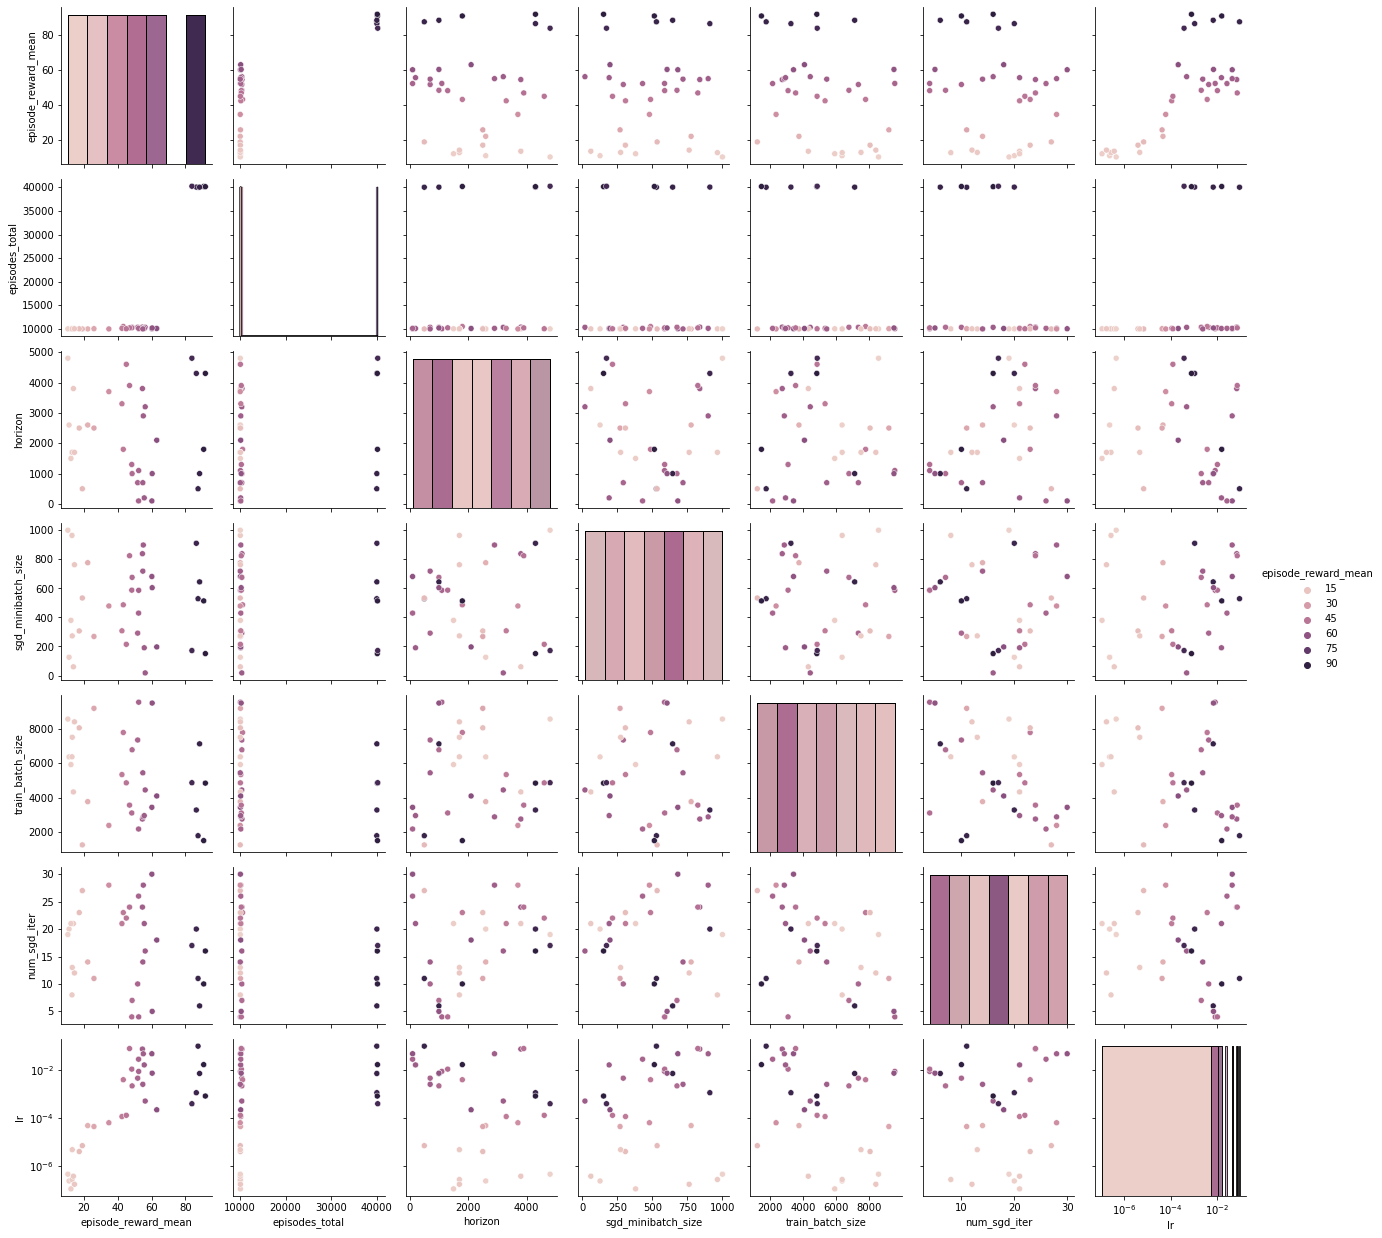

In [23]:
g = sns.PairGrid(alldf, hue="episode_reward_mean", y_vars=alldf.columns, x_vars=alldf.columns)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
lrindexx, = np.where(np.array(g.x_vars) == "lr")
lrindexy, = np.where(np.array(g.y_vars) == "lr")
for ax in g.axes[:, lrindexx]:
    ax[0].set_xscale("log")
for ax in g.axes[lrindexy, :]:
    ax[0].set_yscale("log")


In [17]:
fuldfs = []
i = 0
for path in tqdm.tqdm(glob('logs/gridsearchbad1020201109-172331/**/*tfevents*')):
    try:
        curdf = create_df(path)
        
        curdf['runid'] = i
    except Exception as e:
        print(type(e), e, sep=": ")
    else:
        fuldfs.append(curdf)
        i+=1

  3%|▎         | 1/35 [00:11<06:45, 11.93s/it]

<class 'ValueError'>: Length of values (146) does not match length of index (2255)


  9%|▊         | 3/35 [00:28<05:32, 10.39s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 11%|█▏        | 4/35 [00:45<06:18, 12.21s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 14%|█▍        | 5/35 [00:45<04:20,  8.69s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 17%|█▋        | 6/35 [00:45<03:00,  6.23s/it]

<class 'ValueError'>: Length of values (51) does not match length of index (50)


 20%|██        | 7/35 [01:02<04:23,  9.41s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 26%|██▌       | 9/35 [01:22<04:18,  9.95s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 46%|████▌     | 16/35 [01:57<02:19,  7.33s/it]


KeyboardInterrupt: 

In [ ]:
dff = pd.concat(fuldfs)
sns.set()


In [ ]:
dff['reward'] = dff['episode_reward_mean'] / 2

In [ ]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=dff, x="episodes_total", y="reward", hue="runid", estimator=None, legend=None)
plt.ylabel("mean reward")

In [ ]:
plt.figure(figsize=(7, 5))

sns.lineplot(data=dff, x="episodes_total", y="custom_metrics/inv_mean", hue="runid", estimator=None, legend=None)
plt.ylabel("Mean invest")
plt.ylim(0, 15)
    

In [ ]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=dff, x="episodes_total", y="custom_metrics/accept_mean", hue="runid", estimator=None, legend=None)
plt.ylabel("Mean accept")
plt.ylim(0, 15)
